Singapore Airbnb5

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv("D:/Medium/2 Learned/Singapore Airbnb/listings.csv")
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

Does the minimum_nights and price of the rooms make sense to be rent?

<AxesSubplot:xlabel='minimum_nights'>

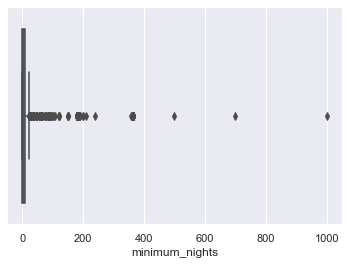

In [3]:
sns.boxplot(x=raw_data['minimum_nights'])

<AxesSubplot:xlabel='price'>

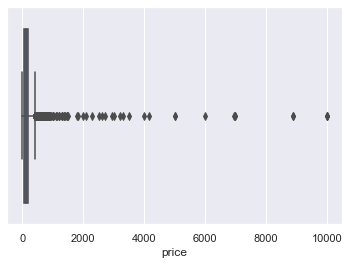

In [4]:
sns.boxplot(x=raw_data['price'])

Let's remove the outlier

In [5]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr #formula for find the outlier on the left side
    fence_high = q3+1.5*iqr #formula for find the outlier on the right side
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [6]:
data_remove_1 = remove_outlier(raw_data,'minimum_nights')
data_remove_2 = remove_outlier(data_remove_1,'price')

Let's see the Result

C:\Users\ubjd\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='minimum_nights'>

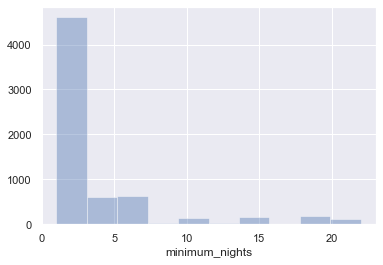

In [7]:
sns.distplot(data_remove_1['minimum_nights'], bins=10, kde=False)

<AxesSubplot:xlabel='price'>

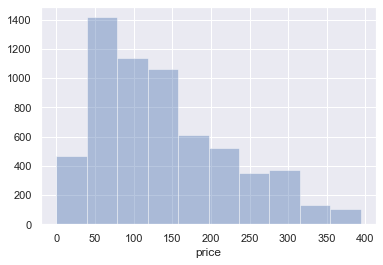

In [8]:
sns.distplot(data_remove_2['price'], bins=10, kde=False)

The purpose is to compare avarage of price each region in Singapore

In [9]:
data = data_remove_2[['neighbourhood_group','price']]

In [10]:
data['neighbourhood_group'].value_counts()

Central Region       4947
West Region           417
East Region           393
North-East Region     257
North Region          154
Name: neighbourhood_group, dtype: int64

In [11]:
data.groupby('neighbourhood_group')['price'].mean()

neighbourhood_group
Central Region       146.034769
East Region          109.931298
North Region          95.675325
North-East Region     88.642023
West Region          103.057554
Name: price, dtype: float64

In [12]:
data['price'].mean()

137.18012321660183

In [13]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
Singapore_data=pd.read_csv("D:/Medium/2 Learned/Singapore Airbnb/listings.csv")

In [15]:
# visualisation of the top 5 rows

Singapore_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [16]:
Singapore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

This shows that the data frame contains 7907 entries and 15 columns (not including the id). 6 of the columns have categorical values, wheres the rest value numerical values. Most of the columns have values for all the data points, however for colums last_review and reviews_per_month there are only 5149 entries.

<ipython-input-17-3f8a3f513a2a>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  Singapore_data.hist(ax = ax)


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'host_id'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'minimum_nights'}>],
       [<AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'reviews_per_month'}>,
        <AxesSubplot:title={'center':'calculated_host_listings_count'}>],
       [<AxesSubplot:title={'center':'availability_365'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

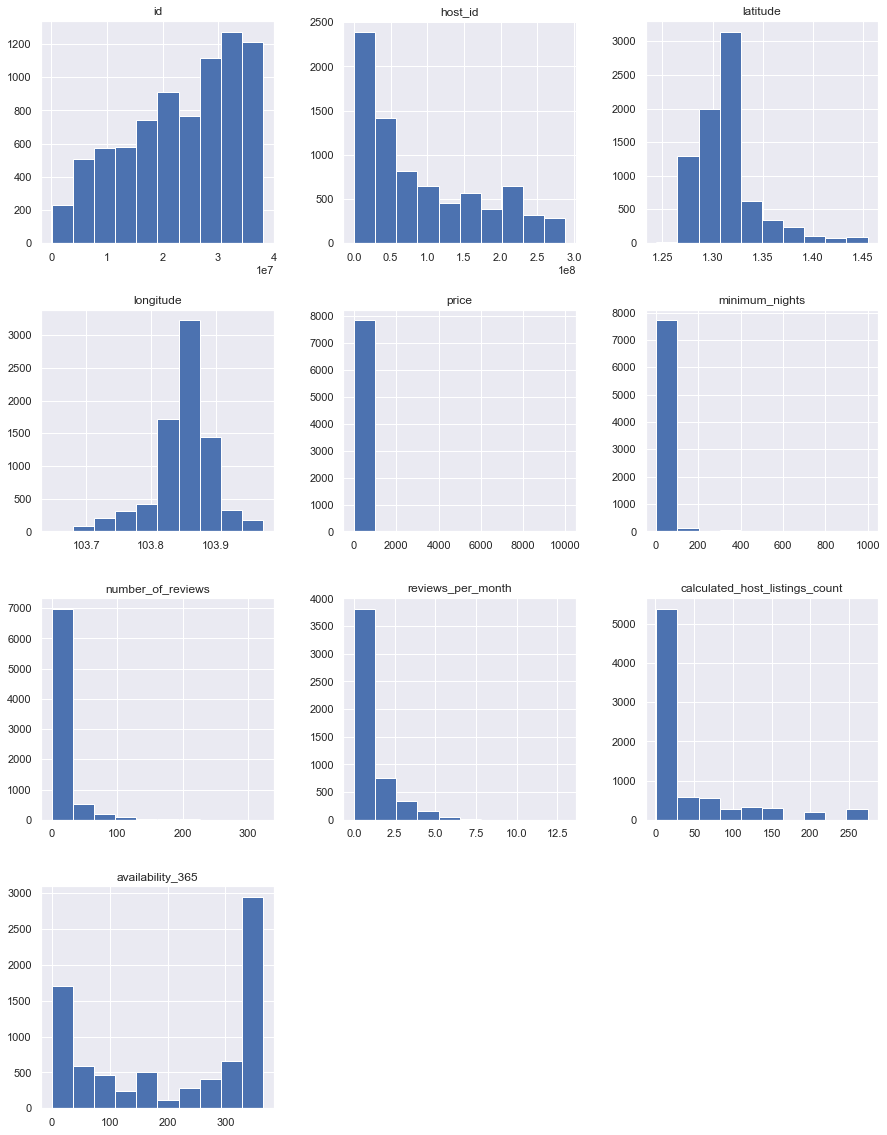

In [17]:
# plt.figure(figsize=(20,30))
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
Singapore_data.hist(ax = ax)

In [18]:
#Description of values in each of the numerical columns

Singapore_data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.907000e+03,7.907000e+03,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,5149.000000,7907.000000,7907.000000
mean,2.338862e+07,9.114481e+07,1.314192,103.848787,169.332996,17.510054,12.807386,1.043669,40.607689,208.726318
std,1.016416e+07,8.190910e+07,0.030577,0.043675,340.187599,42.094616,29.707746,1.285851,65.135253,146.120034
min,4.909100e+04,2.366600e+04,1.243870,103.646560,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.582180e+07,2.305808e+07,1.295795,103.835825,65.000000,1.000000,0.000000,0.180000,2.000000,54.000000
50%,2.470627e+07,6.344891e+07,1.311030,103.849410,124.000000,3.000000,2.000000,0.550000,9.000000,260.000000
75%,3.234850e+07,1.553811e+08,1.322110,103.872535,199.000000,10.000000,10.000000,1.370000,48.000000,355.000000
max,3.811276e+07,2.885676e+08,1.454590,103.973420,10000.000000,1000.000000,323.000000,13.000000,274.000000,365.000000


Correlation

<AxesSubplot:>

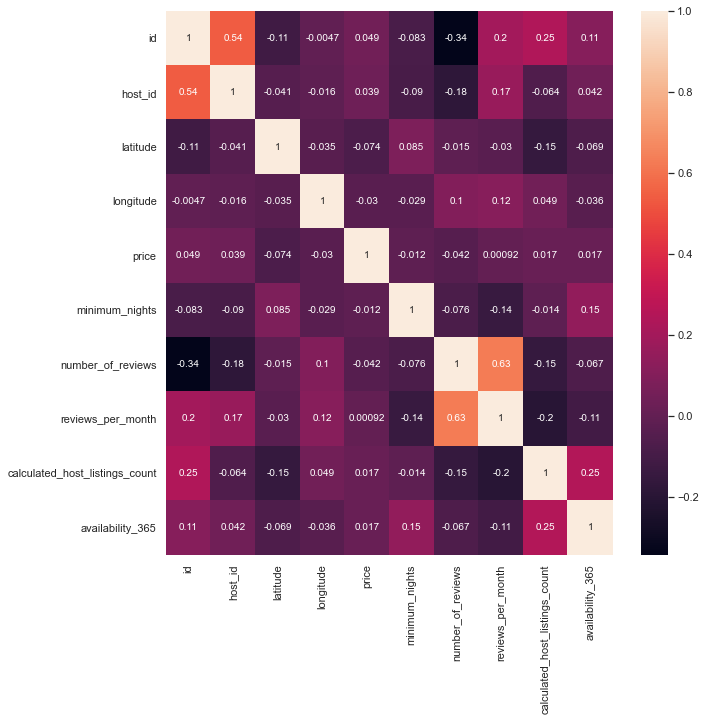

In [19]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(Singapore_data.corr(),annot=True)#,linewidths=5,fmt='.1f',ax=ax)
#plt.show()

The heat map only provides information on the correlation for columns with numerical values. This shows that the variables that have the highest correlation ( avaue close to 1 or -1, 1 if positively correlated. -1 if negatively correlated) are the i and host_id columns and the number_of_reviews and Reviews_per_month. This was expected as these columns refer to very similar things.

From the heatmap above none of the numerical values seem to have a high correlation with the proce. Therefore, the next step will will to understand whether the price is affected by the categorical values (neighbourhood_group, neighbourhood, room_type).

In [20]:
Singapore_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

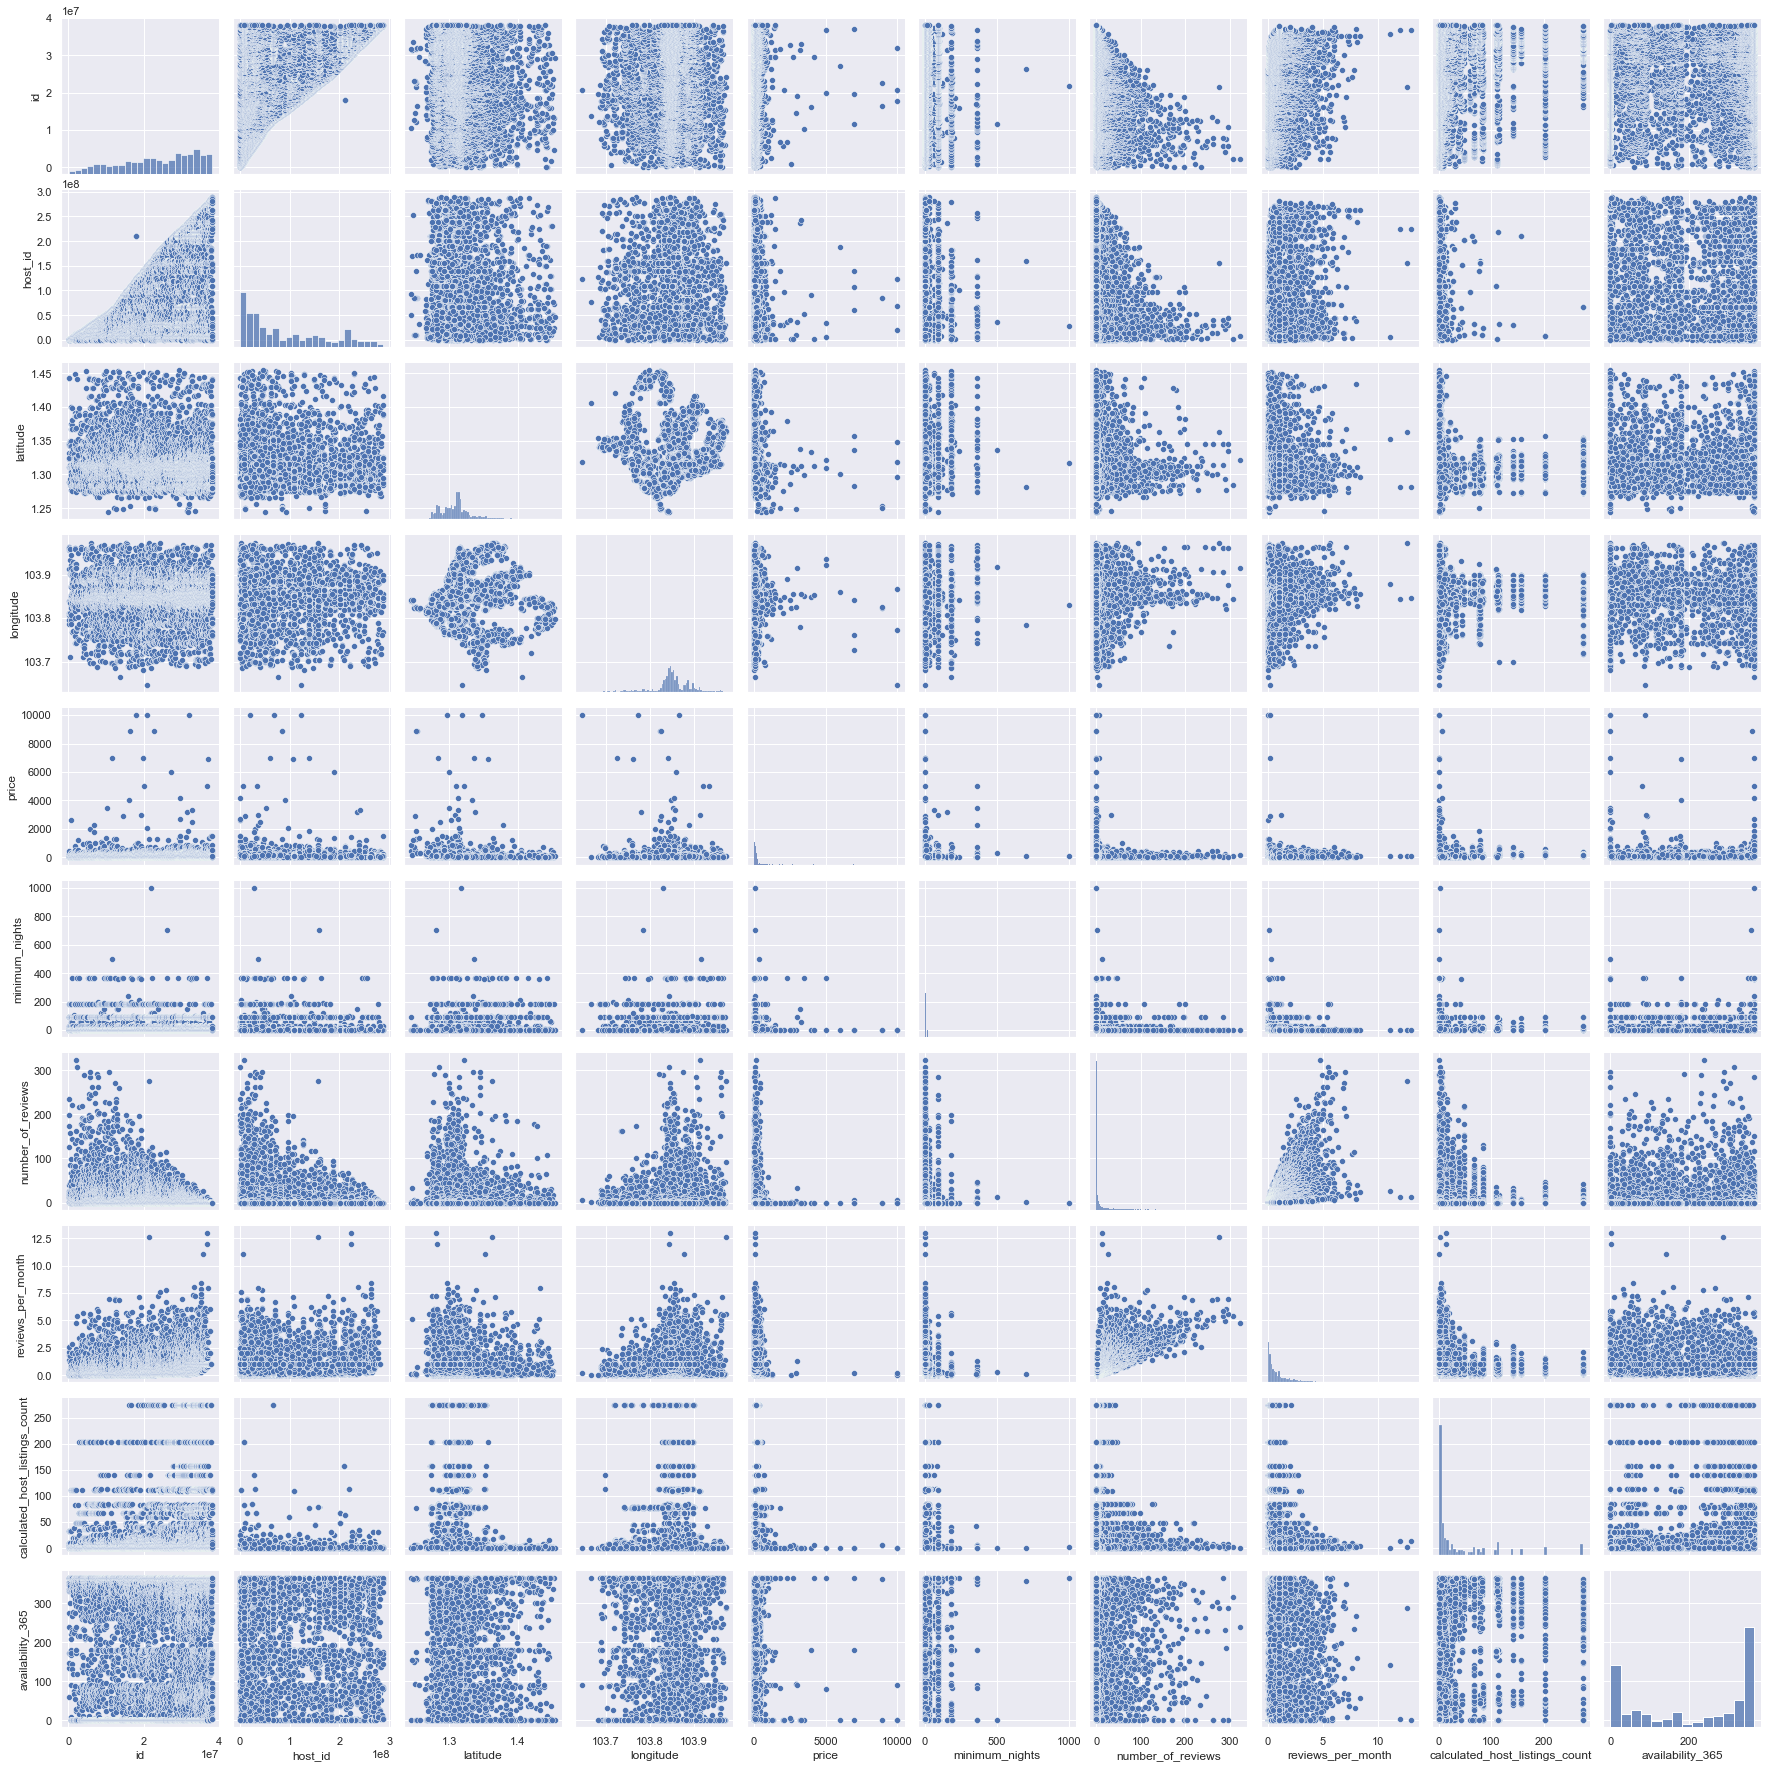

In [21]:
sns.pairplot(Singapore_data)

<AxesSubplot:xlabel='minimum_nights', ylabel='price'>

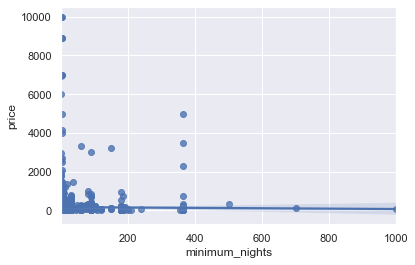

In [22]:
sns.regplot(x="minimum_nights", y="price", data=Singapore_data)

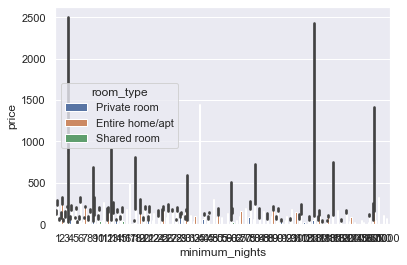

<Figure size 1080x1440 with 0 Axes>

In [23]:
sns.barplot(x="minimum_nights", y="price",hue='room_type' ,data=Singapore_data)
fig = plt.figure(figsize = (15,20))

The next step could be to use this data to create a machine learning model based on these variables to predict the proce per night.

<AxesSubplot:xlabel='minimum_nights', ylabel='price'>

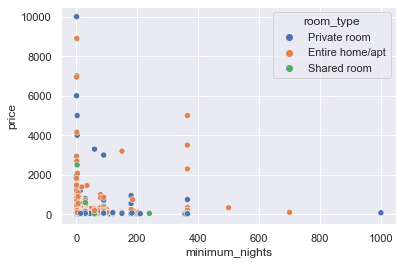

In [24]:
sns.scatterplot(x="minimum_nights", y="price",hue='room_type' , data=Singapore_data)

<AxesSubplot:xlabel='number_of_reviews', ylabel='price'>

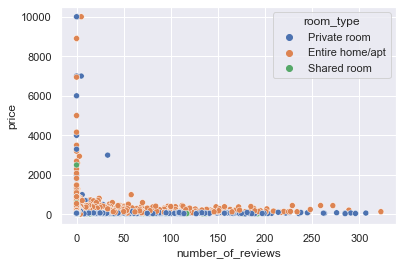

In [25]:
sns.scatterplot(x="number_of_reviews", y="price",hue='room_type' , data=Singapore_data)

<AxesSubplot:xlabel='number_of_reviews', ylabel='price'>

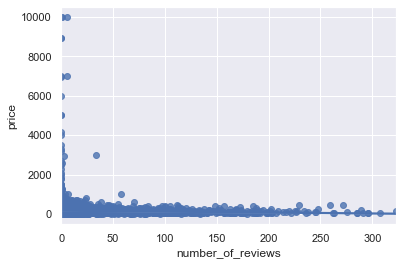

In [26]:
sns.regplot(x="number_of_reviews", y="price", data=Singapore_data)

In [27]:
import numpy as np
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor
r = pearson_r(Singapore_data.minimum_nights, Singapore_data.price)
r

-0.012213635484708456

In [28]:
r = pearson_r(Singapore_data.number_of_reviews, Singapore_data.availability_365)
r

-0.0666580643449999